# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 24th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (person) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

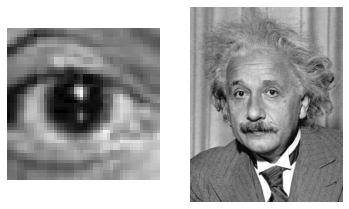

In [1]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()



1.1. Create a function for template matching applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

In [2]:
"""# Your solution here
from numpy.linalg import norm
einstein=io.imread('./images/einstein.png')
eye=io.imread('./images/eye.png')

euclidean = einstein.copy()
einstein = np.array(einstein)
x = eye.shape[0]
y = eye.shape[1]
for i in range((int)(einstein.shape[0]/x)):
    for j in range((int)(einstein.shape[1]/y)):
        for m in range(x):
            for n in range(y):
                euclidean[i*x+ m,j*y + n] = norm(euclidean[i*x + m,j*y + n] - eye[m,n])

print(euclidean.shape)
plt.title("euclidean")
plt.imshow(euclidean, cmap='gray')
plt.xticks([])
plt.yticks([])"""
# Your solution here
from numpy.linalg import norm
from skimage.color import rgba2rgb, rgb2gray

def euclid_distance(image, template):

    x = template.shape[0]
    y = template.shape[1]

    result=image[:image.shape[0]-x,:image.shape[1]-y].copy()
    for i in range((int)(image.shape[0]-x)):
        for j in range((int)(image.shape[1]-y)):
            result[i,j]=np.linalg.norm(template-image[i:i+x,j:j+y])
    #normalize the image
    result=(result - np.min(result))/np.ptp(result)
    return result

In [3]:
from skimage.feature import match_template
from skimage.color import rgb2gray
from skimage import data
from skimage import img_as_float

def match_t(image_gray, template_gray, threshold):
    #first row of images

    image_gray = img_as_float(image_gray)
    template_gray = img_as_float(template_gray)
    result_euclidian = euclid_distance(image_gray, template_gray)
    result_template = match_template(image_gray, template_gray)
    result_template=(result_template - np.min(result_template))/np.ptp(result_template)

    fig = plt.figure(figsize=(8, 3))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

    ax1.imshow(image_gray, cmap="gray")
    ax1.set_axis_off()
    ax1.set_title('original image')

    ax2.imshow(result_euclidian, cmap="gray")
    ax2.set_axis_off()
    ax2.set_title('euclidean distance')

    ax3.imshow(result_template, cmap='gray')
    ax3.set_axis_off()
    ax3.set_title('normalized cross-correlation')
    plt.show()

    #second row of images

    mask_euc = (result_euclidian <= (1-threshold))
    result_euc = np.zeros((result_euclidian.shape), dtype=np.uint8)
    result_euc[mask_euc] = 255

    mask_t = (result_template >= threshold)
    result_t = np.zeros((result_template.shape), dtype=np.uint8)
    result_t[mask_t] = 255


    fig = plt.figure(figsize=(8, 3))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

    ax1.imshow(template_gray, cmap="gray")
    ax1.set_axis_off()
    ax1.set_title('template')

    ax2.imshow(result_euc, cmap="gray")
    ax2.set_axis_off()
    ax2.set_title('thresholded euclid dist')

    ax3.imshow(result_t, cmap='gray')
    ax3.set_axis_off()
    ax3.set_title('thresholded normal. cross')
    # highlight matched region
    ax3.autoscale(False)

    plt.show()

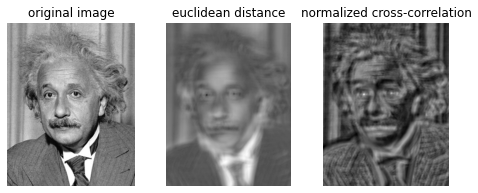

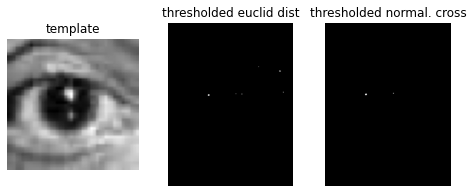

In [4]:
eye=io.imread('./images/eye.png')
eye=rgb2gray(rgba2rgb(eye))
einstein=io.imread('./images/einstein.png')
einstein=rgb2gray(rgba2rgb(einstein))

match_t(einstein, eye, 0.71)

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


1.2 Display the results on `einstein_br.png`:

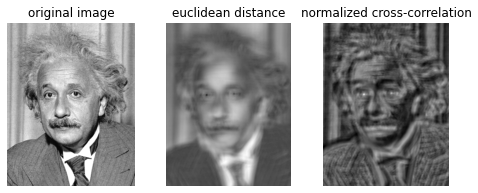

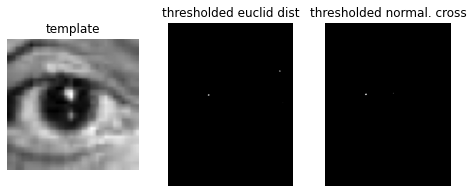

In [5]:
# Your solution here
einstein_br = io.imread('./images/einstein_br.png')
match_t(einstein_br, eye, 0.75)

1.3 Display the results on `einstein_mask.png`:

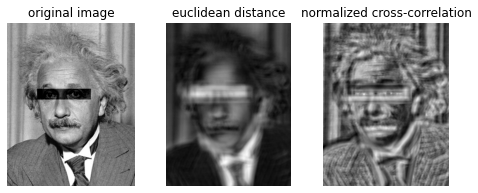

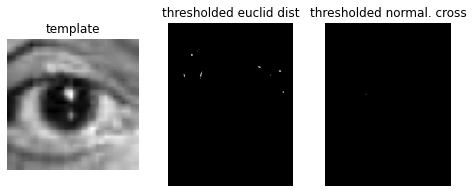

In [6]:
# Your solution here
einstein_mask = io.imread('./images/einstein_mask.png')
match_t(einstein_mask, eye, 0.97)

1.4.
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

In [7]:
# Your solution here

1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

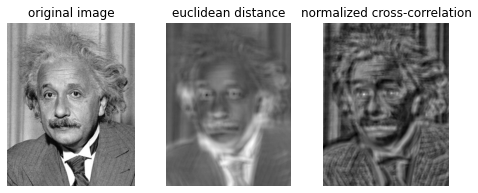

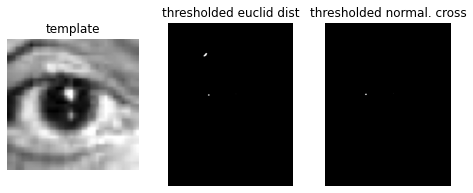

In [8]:
# Your solution here
eye_br = io.imread('./images/eye_br.png')
match_t(einstein, eye_br, 0.76)

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

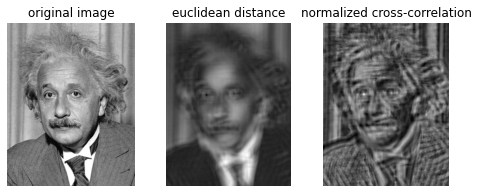

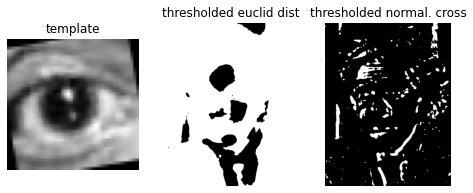

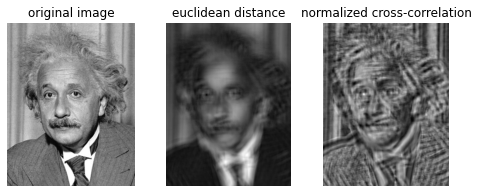

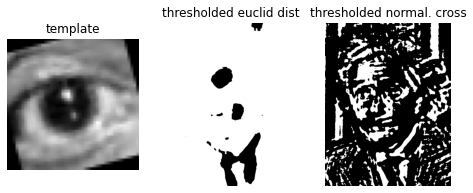

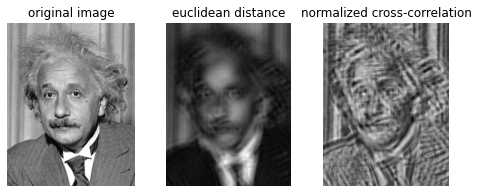

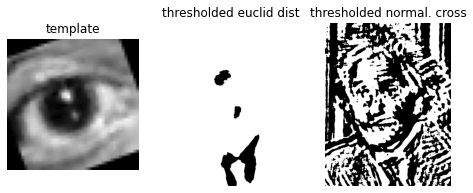

'the threshold obviously changes'

In [9]:
# Your solution here
from skimage.transform import rotate

eye_10 = rotate(eye, 10)
match_t(einstein, eye_10, 0.55)

eye_15 = rotate(eye, 15)
match_t(einstein, eye_15, 0.5)

eye_20 = rotate(eye, 20)
match_t(einstein, eye_20, 0.45)
"""When you use resize=True a mismatch in the result is produced"""
"""the threshold obviously changes"""

1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

In [10]:
# Your solution here

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to object (person) detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'person_template.png' and the folder '/images/TestPersonImages/', apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

2.1. Read the template ('person_template.png'), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

In [11]:
def image_hog(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(4, 4), visualize=True, multichannel=True)

    return exposure.rescale_intensity(hog_image, in_range=(0, 10))

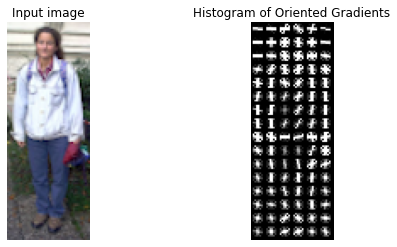

In [12]:
# Your solution here
from skimage.feature import hog
from skimage import exposure

person_template = io.imread('./images/person_template.bmp')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(person_template, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = image_hog(person_template)
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

2.2. Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [13]:
# Your solution here
def visualize_22(person,imgTemp): 
    person_hog = image_hog(person)
    template_hog = image_hog(imgTemp)
    result = match_template(person_hog, template_hog)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]
    
    imgTemp = rgb2gray(rgba2rgb(imgTemp))
    #visualize it
    fig = plt.figure(figsize=(8,3))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)

    ax1.imshow(imgTemp, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Person Template')

    ax2.imshow(person, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('Best Region Match')
    # highlight matched region
    himg, wimg = imgTemp.shape
    rect = plt.Rectangle((x, y), wimg, himg, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3.imshow(person_hog, cmap='gray')
    ax3.set_axis_off()
    ax3.set_title('HOG distances')
    # highlight matched region
    ax3.autoscale(False)
    rect = plt.Rectangle((x, y), wimg, himg, edgecolor='r', facecolor='none')
    ax3.add_patch(rect)

    plt.show()


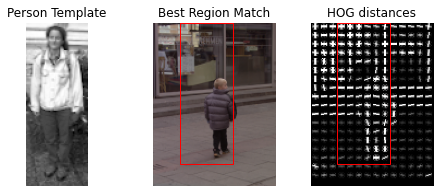

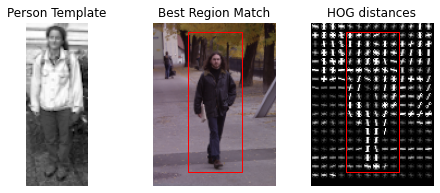

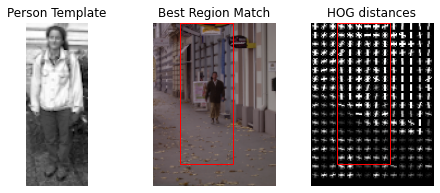

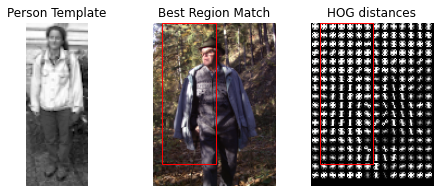

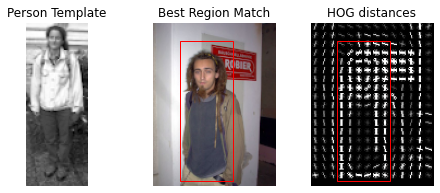

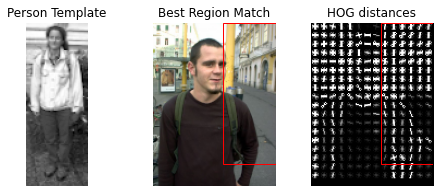

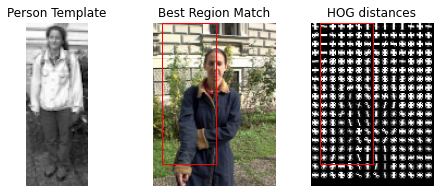

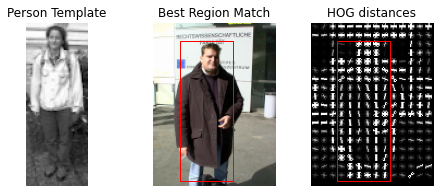

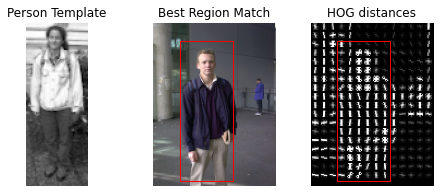

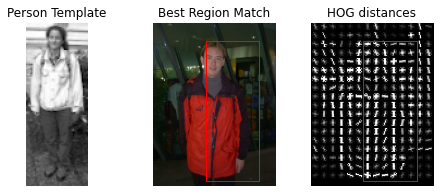

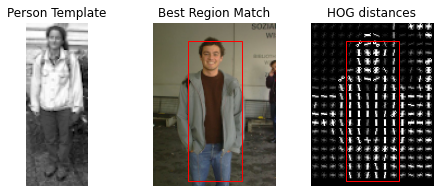

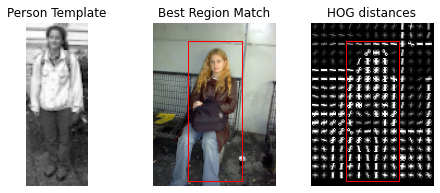

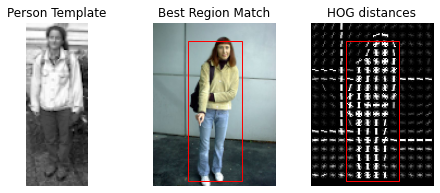

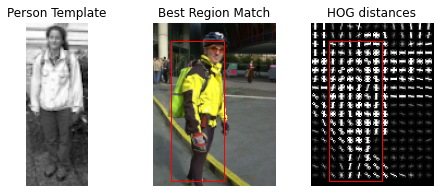

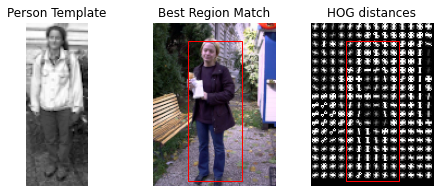

In [14]:
# Your solution here
from skimage.color import rgb2gray, rgba2rgb

for i in range(13, 29):
    person_template_g = person_template
    if(i!=19):
        person = io.imread('./images/TestPersonImages/person_0'+str(i)+'.bmp')#person_0'+str(i)+'.bmp'
        visualize_22(person, person_template_g)

In [15]:
# Your solution here

3.3. 
- Count on how many images were the persons detected correctly and discuss the failures. What do you think can be the reasons for the failures?
- Discuss what are the parameters of the HOG algorithm. Test several values of the parameters up to your criterion to show which are the optimal values for the person detection problem.
- Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [16]:
# Your solution here
"""There are six images that are not detected correctly. The photo number one, for example,
it is not detected properly because the proportions of the kid are different from the proportions of the 
man in the template. On the other hand,in the photo number three the man standing in the street is too far from 
the camera, so the size of the man is too small. Finally, in the photos number 4, 6, 7 and 10, the sleeve of the 
jacket is recognised as a person and therefore selected.

Talking about the parameters of the HOG algorithm, first we have the image we want to compute, the number of
orientation bins (the number of angles they can have) and the number of pixels per cells and pixels per blocks.
We saw good results with 8 orientation bins and 8 pixels per cells and 4 pixels per blocks. This number depends
on the image, if you select bigger cells you ignore small changes, the same with the number of blocks.
The method that you choose to normalize the blocks helps to remove the effect of local light differences, because
we use as a reference a mesure o intensity across a block and normalize all cells within the block with this 
intensity value. The visualization parameter you decide if you want an image of the HOG. transform_sqrt also 
allows you to normalize, in this case you normalize the image before processing. Lastly, with feature_vector you
can return an image of a certain with and height as a vector and with multichannel you can select how to consider 
the last dimension of the image: as a color or as spacial.
    
The Histogram of oriented is used for the purpose of object detection. Basicaly, we count ocurrences of gradient 
orientation in localized portions of an image, On the other hand, template matching is a technique used for 
finding an image inside another image. This image should match another one called template. With a template based
object detector we are computing the distance between the template and subimages of the image, called windows.
The problem with template matching is that it detects changes in grayscale value, which is not a precise way to
detect simmilarities between pictures. Same ilumination does not mean same pixels. To sum up, it is deeply affected
by ilumination changes and mask values and variance. The HOG based method comes to make it independent of the 
template variance.
Additionally, the HOG based object detector extract descriptors from the template and each subimage (window) of 
the image and compare them. It uses the gradient to detect changes, which is a similar technique to the edge 
orientation histogram. We do not need the magnitude. This way we achieve invariation in illumination changes and 
shadowing.
In summary, with the template based method we compare pixels and with the HOG based method we compare descriptors.
The HOG based method is more sophisticated because it is not so dependent of illumination changes."""

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1
(a) Detect the censure in the image `starbucks4.jpg`. 

(b) Analyze and discuss the effect of different values of the parameters in censure function.



I found  152 keypoints


"if we choose non_max_threshold=0.05 we obtain 152 keypoints. As you select a bigger threshold you obtain smaller \nnumber of points. On the contrary, as you select bigger values for line_threshold you'll obtain samller amount of\npoints. For example, with line_threshold=50 we obtain 183 keypoints"

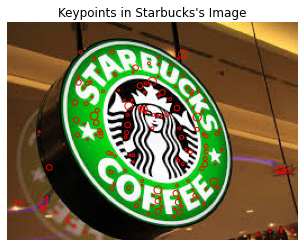

In [17]:
# Your solution here
from skimage.feature import CENSURE

starbucks4 = io.imread('./images/starbucks4.jpg')

img_gr = rgb2gray(starbucks4)

detector = CENSURE(non_max_threshold=0.05)
detector.detect(img_gr)
print('I found ', len(detector.keypoints), 'keypoints')

plt.imshow(starbucks4, cmap=plt.cm.gray)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.title("Keypoints in Starbucks's Image")
plt.axis('off')

"""if we choose non_max_threshold=0.05 we obtain 152 keypoints. As you select a bigger threshold you obtain smaller 
number of points. On the contrary, as you select bigger values for line_threshold you'll obtain samller amount of
points. For example, with line_threshold=50 we obtain 183 keypoints"""

3.2 

(a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

(b) Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [18]:
def get_ORB(img1, img2, names, number_images, max_ratio=None):
    descriptor_extractor = ORB(n_keypoints=200)

    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    matches_array = []
    for i in range(number_images): 
        descriptor_extractor.detect_and_extract(img2[i])
        keypoints2 = descriptor_extractor.keypoints
        descriptors2 = descriptor_extractor.descriptors

        matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
                
        matches_array.append((img1, img2[i], keypoints1, keypoints2, matches12))
        
    matches_array.sort(key=lambda x: len(x[4]), reverse=True)  
    
    for i in range(number_images):
        fig, ax = plt.subplots()
        
        plt.gray()

        #plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
        plot_matches(ax, matches_array[i][0], matches_array[i][1], matches_array[i][2], matches_array[i][3], matches_array[i][4])
        ax.axis('off')
        ax.set_title("starbucks vs. " + names[i] + ". Matches = {0}".format(str(len(matches_array[i][4]))))

        plt.show()

In [19]:
# Your solution here
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
get_ORB(rgb2gray(starbucks), [rgb2gray(starbucks4)], ["starbucks4"], 1)

NameError: name 'starbucks' is not defined

3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

In [ ]:
# Your solution here
starbucks2 = io.imread('./images/starbucks2.png')
starbucks5 = io.imread('./images/starbucks5.png')
starbucks6 = io.imread('./images/starbucks6.jpg')
starbucksC = io.imread('./images/starbucksCup.jpg')
images = [rgb2gray(starbucks4), rgb2gray(rgba2rgb(starbucks2)), rgb2gray(starbucks5), rgb2gray(starbucks6), rgb2gray(starbucksC)]
names = ["starbucks4", "starbucks2", "starbucks5", "starbucks6", "starbucksCup"]
get_ORB(rgb2gray(starbucks), images, names, 5)

3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

In [ ]:
# Your solution here
import skimage.transform as tf
from skimage.transform import rescale
from skimage.color import rgba2rgb

#change the orientation of the model
rotationdegrees = 180
img_rotated = tf.rotate(starbucks, rotationdegrees)
get_ORB(rgb2gray(img_rotated), [rgb2gray(starbucks)], ["starbucks4"], 1)

#change the scale and orientation of the scene image
images = [rgb2gray(starbucks4), rgb2gray(rgba2rgb(starbucks2)), rgb2gray(starbucks5), rgb2gray(starbucks6), rgb2gray(starbucksC)]
names = ["starbucks4", "starbucks2", "starbucks5", "starbucks6", "starbucksCup"]

for i in range(len(images)):
    img_rotated = tf.rotate(images[i], rotationdegrees)
    img_rescaled = rescale(img_rotated,0.5)
    get_ORB(rgb2gray(starbucks), [img_rescaled], [names[i]], 1)

3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



<ipython-input-25-14d4fc071985>:16: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  get_ORB(rgb2gray(cocaTemplate), [rgb2gray(img_rotated)], ["cocaCola1"], 1)


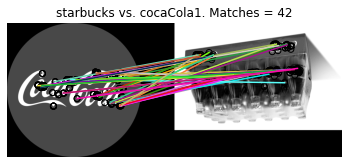

<ipython-input-25-14d4fc071985>:25: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  get_ORB(rgb2gray(cocaTemplate), [img_rescaled], [names[i]], 1)


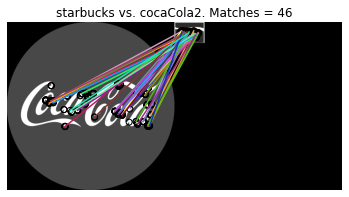

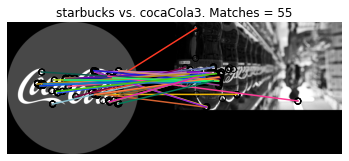

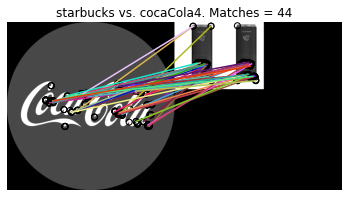

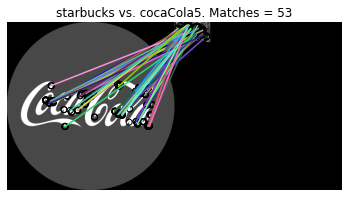

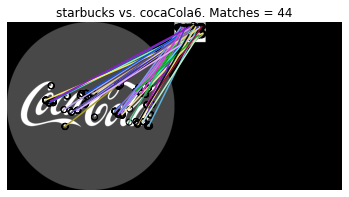

In [25]:
# Your solution here
import skimage.transform as tf
from skimage.transform import rescale
from skimage.color import rgba2rgb

cocaTemplate = io.imread('./images/CocaColaImages/cocacola_logo.png')
cocaCola1 = io.imread('./images/CocaColaImages/cocacola1.jpg')
cocaCola2 = io.imread('./images/CocaColaImages/cocacola2.png')
cocaCola3 = io.imread('./images/CocaColaImages/cocacola3.jpg')
cocaCola4 = io.imread('./images/CocaColaImages/cocacola4.jpg')
cocaCola5 = io.imread('./images/CocaColaImages/cocacola5.png')
cocaCola6 = io.imread('./images/CocaColaImages/cocacola6.jpg')
#change the orientation of the model
rotationdegrees = 180
img_rotated = tf.rotate(cocaCola1, rotationdegrees)
get_ORB(rgb2gray(cocaTemplate), [rgb2gray(img_rotated)], ["cocaCola1"], 1)

#change the scale and orientation of the scene image
images = [rgb2gray(rgba2rgb(cocaCola2)), rgb2gray(cocaCola3), rgb2gray(cocaCola4), rgb2gray(rgba2rgb(cocaCola5)), rgb2gray(cocaCola6)]
names = ["cocaCola2", "cocaCola3", "cocaCola4", "cocaCola5", "cocaCola6"]

for i in range(len(images)):
    img_rotated = tf.rotate(images[i], rotationdegrees)
    img_rescaled = rescale(img_rotated,0.8)
    get_ORB(rgb2gray(cocaTemplate), [img_rescaled], [names[i]], 1)

3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

In [26]:
# Your solution here

#ORB focuses on characteristic points of the image, so it is not effected nearly as much as other methods on rescaling
#Also, it still works almost perfectly when rotating the image.

#If we analysed an image not containing the starbucks logo, the algorithm would find some matches where some arbitrary
#points of the image would resemble a part of the logo, but it would find a low ammount of matches, at least in theory.
#However, we could surely find some examples where it finds a lot of matches.

#We could define a quality measure for correspondance between images by using HOG to check if a part of one of the images
#is highly similar to a part of the other image, and then applying ORB and check how many matches there are. If the ammount
#of matches is high, we consider the images to correspond to each other.

### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)